In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("../EURUSDPrediction/Data/train.csv")
data = data.drop(columns=["Unnamed: 0", "Datetime"])

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,1.187085,1.187225,1.186521,1.186944,1.186944,0
1,1.186944,1.187790,1.186662,1.187225,1.187225,0
2,1.187507,1.187507,1.186521,1.186803,1.186803,0
3,1.187085,1.187507,1.186240,1.187507,1.187507,0
4,1.187790,1.187931,1.187366,1.187507,1.187507,0


In [6]:
def features(d, i):
    df = d.copy()
    df["Close_"] = df["Close"].shift(-1)
    df["Open_"] = df["Open"].shift(-1)
    df["High_"] = df["High"].shift(-1)
    df["Low_"] = df["Low"].shift(-1)
    df["Close__"] = df["Close"].shift(1)
    df["Open__"] = df["Open"].shift(1)
    df["High__"] = df["High"].shift(1)
    df["Low__"] = df["Low"].shift(1)
    df["Gain"] = np.where(df["Close"] > df["Close_"], 1, -1)
    df["CBody"] = (df["High"]- df["Low"]).shift(-1)
    df["Trend"] = np.where(df["Close"]>df["Open"], 1, -1)
    df["Body"] = np.abs(df["Open"]-df["Close"])
    df["StdV"] = df["Volume"].rolling(i).std()/df["Body"]
    df["Variation"] = df["High"] - df["Low"]
    df["M"] = df["Variation"] - df["Body"]
    
    df["Msup"] = np.where(df["Open"]>df["Close"], (df["High"] - df["Open"])/df["Body"], (df["High"] - df["Close"])/df["Body"])
    df["Minf"] = np.where(df["Open"]>df["Close"],(df["Close"] -  df["Low"])/df["Body"] , (df["Open"] - df["Low"])/df["Body"])
    df["H"] = df["High"].rolling(i).std()/df["Body"]
    df["O"] = df["Open"].rolling(i).std()/df["Body"]
    df["C"] = df["Close"].rolling(i).std()/df["Body"]
    df["L"] = df["Low"].rolling(i).std()/df["Body"]
    df["L1"] = (df["Low"] - df["Low__"]).abs()/df["Body"]
    df["O1"] = (df["Open"] - df["Open__"]).abs()/df["Body"]
    df["C1"] = (df["Close"] - df["Close__"]).abs()/df["Body"]
    df["H1"] = (df["High"] - df["High__"]).abs()/df["Body"]
    df["alpha"] = (df["Msup"] + df["Minf"])/df["Body"]
    df["sl"] = np.where(df["Trend"]==1, df["High_"] - df["Open_"], df["Open_"] - df["Low_"])
    df["tp"] = np.where(df["Trend"]==1, df["Open_"] - df["Low_"], df["High_"] - df["Open_"])
    df = df.dropna()
    return df

In [11]:
X = features(data, 28)
X = X[X["Trend"]==1]
x = "alpha"
y = "Variation"
z1 = "tp"
z2 = "sl"

Text(0.5, 0, 'sl')

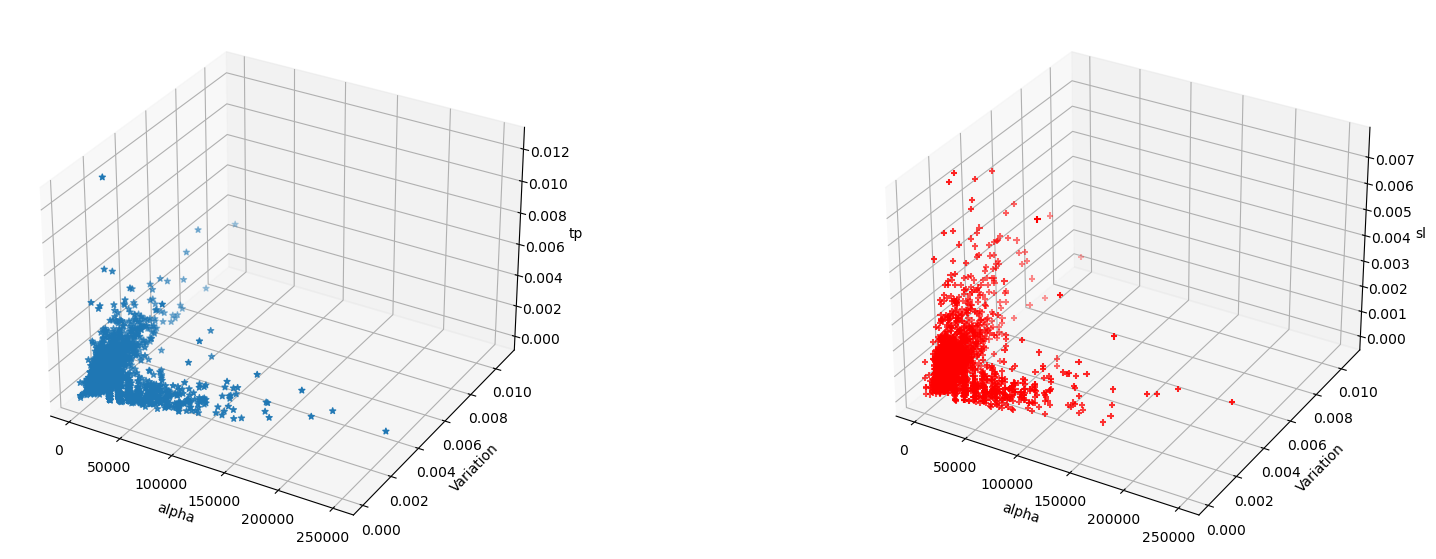

In [12]:
fig,axes = plt.subplots(figsize=(20, 7), ncols=2, nrows=1, subplot_kw={'projection': '3d'})
axes[0].scatter(X[x],X[y],X[z1], marker = "*")
axes[0].set_xlabel(x)
axes[0].set_ylabel(y)
axes[0].set_zlabel(z1)

axes[1].scatter(X[x],X[y],X[z2], marker = "+", color = "r")
axes[1].set_xlabel(x)
axes[1].set_ylabel(y)
axes[1].set_zlabel(z2)

In [15]:
X_ = X[X["Variation"]>=0.006]

Text(0.5, 0, 'sl')

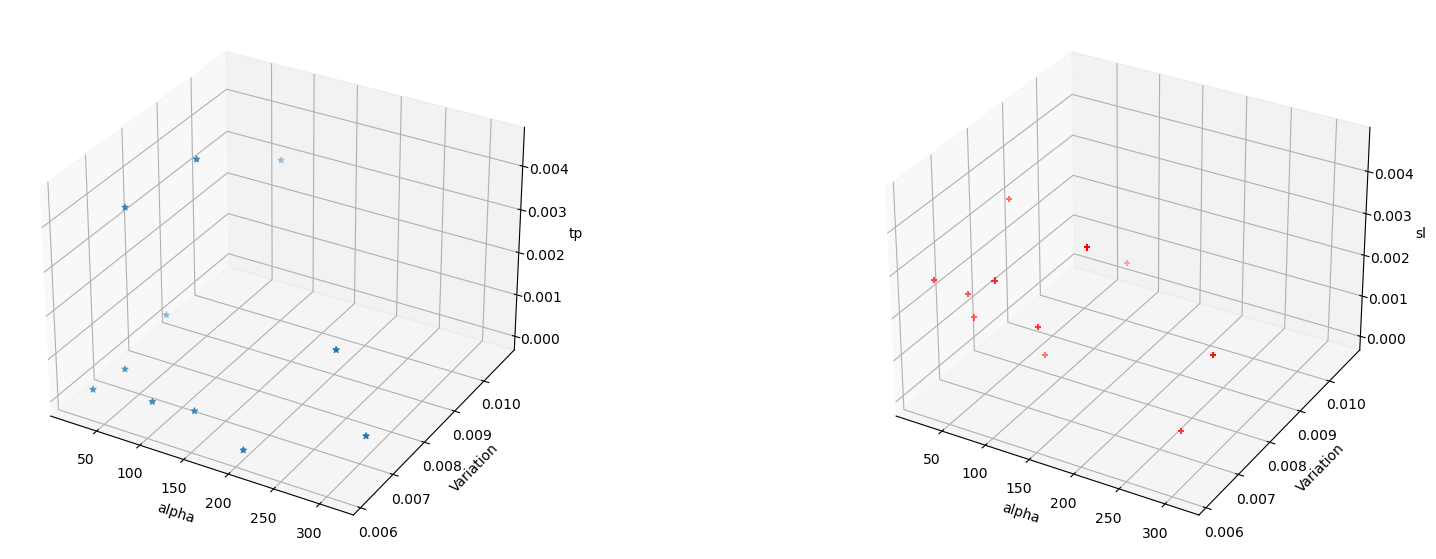

In [16]:
fig,axes = plt.subplots(figsize=(20, 7), ncols=2, nrows=1, subplot_kw={'projection': '3d'})
axes[0].scatter(X_[x],X_[y],X_[z1], marker = "*")
axes[0].set_xlabel(x)
axes[0].set_ylabel(y)
axes[0].set_zlabel(z1)

axes[1].scatter(X_[x],X_[y],X_[z2], marker = "+", color = "r")
axes[1].set_xlabel(x)
axes[1].set_ylabel(y)
axes[1].set_zlabel(z2)